# Tarea 3 - Álgebra Lineal y Optimización para Data Science

Debe entregar este Colab con sus respuestas a más tardar el día 13 de Diciembre a las 23:59 hrs, vía Webcursos. No se aceptan atrasos. No olvide indicar los integrantes de su grupo.




In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Pregunta 1 (3.0 pts)

Considere la siguiente función:

$$ f(x,y) = 0.5x^2 + 12y^2$$

### Parte 1 (1.5 pts)

Implemente una función `f_GD(x_0, y_0, eta, num_iter)` que aplica descenso por el gradiente básico a la función $f$. Los argumentos `x_0` e `y_0` son el punto de partida, `eta` es la tasa de aprendizaje y `num_iter` el número de iteraciones. La salida debe ser:
- Primero, un vector Numpy con la solución alcanzada.
- Segundo, una lista con la secuencia de los x's que vemos iteración tras iteración. El primer elemento de la lista es `x_0`, y luego tenemos los x's después de cada iteración. El tamaño de esta lista debe ser `num_iter + 1`. 
- Tercero, lo mismo que arriba pero con los y's. 

Ejecute su función con argumentos `x_0 = 10`, `y_0 = 1`, `eta = 0.075` y `num_iter = 32`, y grafique en dos dimensiones la evolución del algoritmo. Puede utilizar el siguiente código para graficar. 

¿Qué puede observar?

In [14]:
def f(sol):
    x = sol[0]
    y = sol[1]
    return 0.5*x**2 + 12*y**2

x_0, y_0 = 10,1
eta = 0.075
num_iter = 32

def f_GD(x_0, y_0, eta, num_iter):

    x = [x_0]
    y = [y_0]

    for k in range(num_iter):
        grad_x = x[k]
        grad_y = 24*y[k]
        x.append(x[k] - eta * grad_x)
        y.append(y[k] - eta * grad_y)
        
    sol = np.array([x[-1], y[-1]])
    return sol, x, y

Solucion obtenida:  [4.11313793e-03 2.03703598e-10]
Valor Mínimo alcanzado: 8.45895183567581e-06


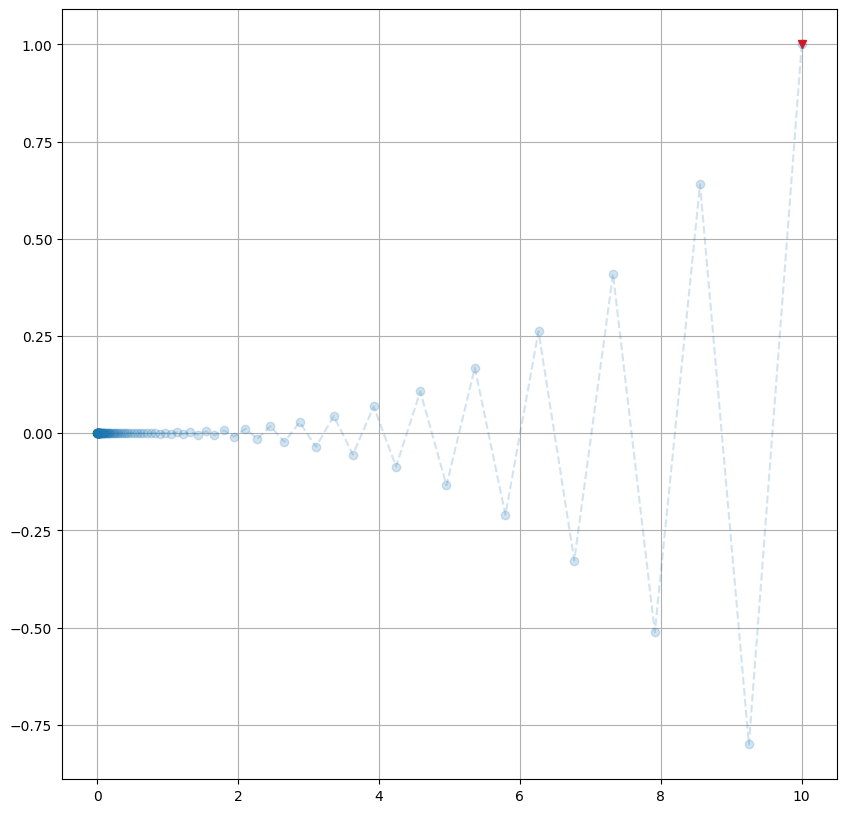

In [17]:
sol, list_x, list_y = f_GD(10, 1, 0.075, 100)

print("Solucion obtenida: ", sol)

plt.figure(figsize=(10, 10))
plt.plot([0], [0], "go")
plt.plot([10], [1], "rv")
plt.plot([sol[0]], [sol[1]], "c*")
plt.plot(list_x, list_y, "o--", alpha=0.2)
plt.grid(True)
print(f"Valor Mínimo alcanzado: {f(sol)}")
plt.show()


### Parte 2 (1.5 pts)

Implemente una función `f_GD_Momentum(x_0, y_0, eta, beta, num_iter)` que aplica descenso por el gradiente con momentum a la función $f$. Los argumentos `x_0` e `y_0` son el punto de partida, `eta` es la tasa de aprendizaje, `beta` es el parámetro del momentum y `num_iter` el número de iteraciones. La salida debe ser lo mismo que en la pregunta anterior.

Ejecute su función con argumentos `x_0 = 10`, `y_0 = 1`, `eta = 0.075`, `beta=0.9` y `num_iter = 32`, y grafique en dos dimensiones la evolución del algoritmo.

¿Qué puede observar?

In [18]:
def v(grad, beta, v):
    if len(v)==0:
        return (1-beta)*grad
    else:
        return beta*v[-1]+(1-beta)*grad


def f_GD_Momentum(x_0, y_0,eta , beta, num_iter):
    x = [x_0]
    y = [y_0]
    v_x = []
    v_y = []
    for k in range(num_iter):
        grad_x = x[k]
        grad_y = 24*y[k]
        v_x.append(v(grad_x, beta, v_x))
        v_y.append(v(grad_y, beta, v_y))
        x.append(x[k] - eta * v_x[k])
        y.append(y[k] - eta * v_y[k])
    
    sol = np.array([x[-1], y[-1]])
    return sol, x, y

Solucion obtenida:  [-0.27661234  0.01692935]
Valor Mínimo alcanzado: 0.04169642864475021


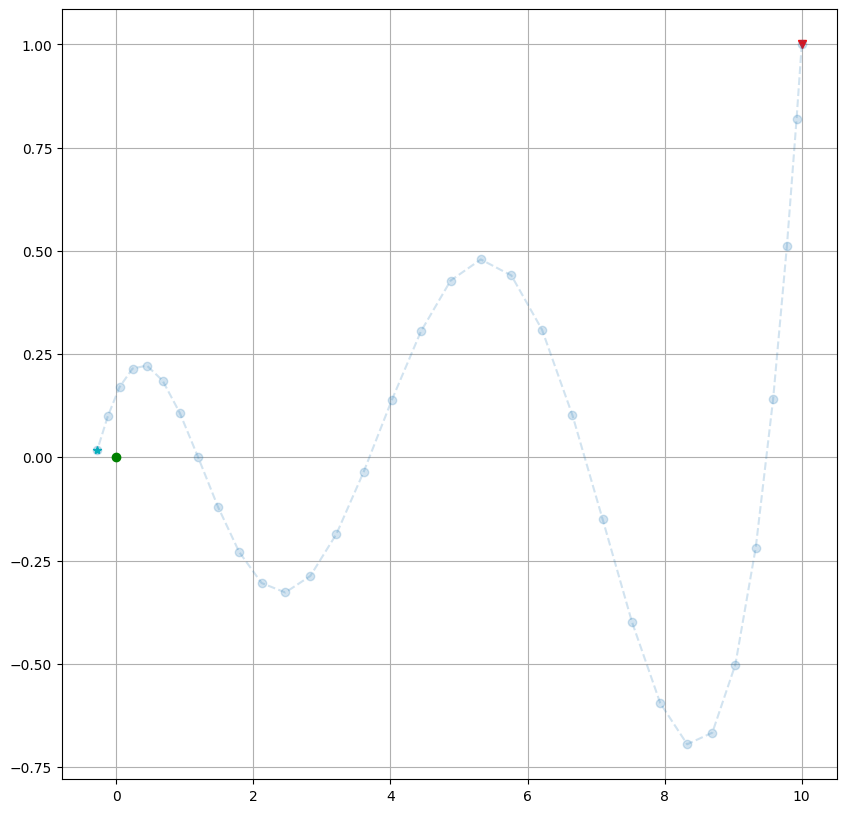

In [21]:
sol, list_x, list_y = f_GD_Momentum(10, 1, 0.075, 0.9, 32)

print("Solucion obtenida: ", sol)

plt.figure(figsize=(10, 10))
plt.plot([0], [0], "go")
plt.plot([10], [1], "rv")
plt.plot([sol[0]], [sol[1]], "c*")
plt.plot(list_x, list_y, "o--", alpha=0.2)
plt.grid(True)
print(f"Valor Mínimo alcanzado: {f(sol)}")
plt.show()

## Pregunta 2 (3.0 pts)

Considere la siguiente función:

$$ f(x,y) = (x-1)^2 + (y-2)^2 + 1$$

### Parte 1 (1.0 pts)

Implemente una función `f_GD(x_0, y_0, eta, num_iter)` que aplica descenso por el gradiente básico a la función $f$. Los argumentos `x_0` e `y_0` son el punto de partida, `eta` es la tasa de aprendizaje y `num_iter` el número de iteraciones. La salida debe ser lo mismo que en la pregunta anterior

Ejecute su función con argumentos `x_0 = -0.5`, `y_0 = 0.5`, `eta = 0.001` y `num_iter = 10000`, y grafique en dos dimensiones la evolución del algoritmo. Puede utilizar el siguiente código para graficar. 

In [26]:
def f(sol):
    x = sol[0]
    y = sol[1]
    return (x-1)**2+(y-2)**2+1

In [27]:
def f_GD(x_0, y_0, eta, num_iter):

    x = [x_0]
    y = [y_0]

    for k in range(num_iter):
        grad_x = 2*(x[k]-1)
        grad_y = 2*(y[k]-2)
        x.append(x[k] - eta * grad_x)
        y.append(y[k] - eta * grad_y)
        
    sol = np.array([x[-1], y[-1]])
    return sol, x, y

Solucion obtenida:  [1. 2.]
Valor Mínimo alcanzado: 1.0


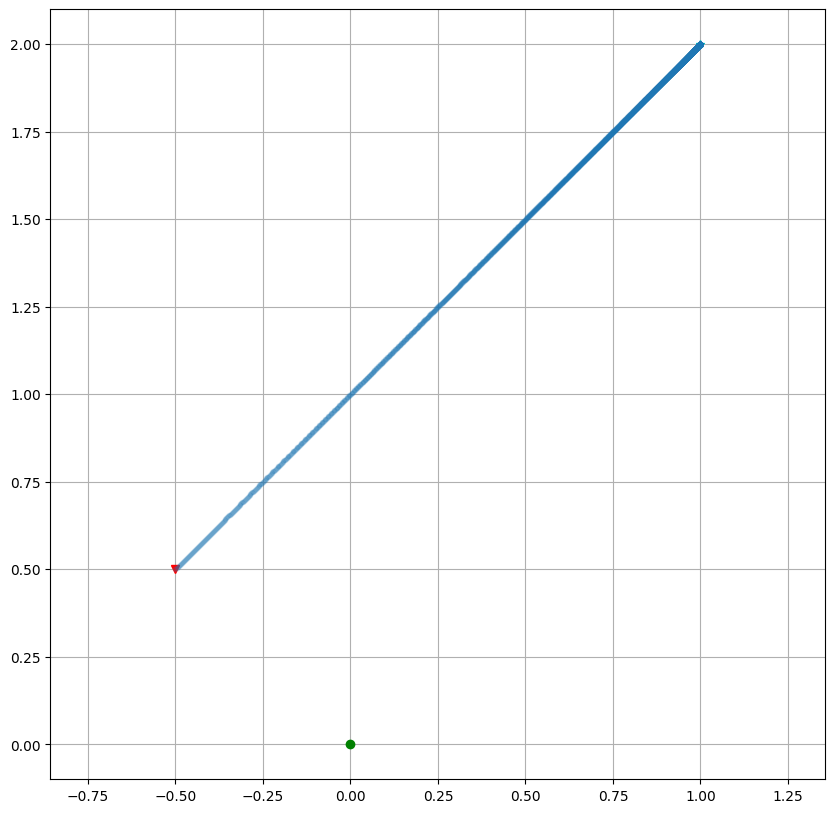

In [28]:
sol, list_x, list_y = f_GD(-0.5, 0.5, 0.001, 10000)

print("Solucion obtenida: ", sol)

plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.plot([0], [0], "go")
plt.plot([-0.5], [0.5], "rv")
plt.plot([sol[0]], [sol[1]], "c*")
plt.plot(list_x, list_y, ".", alpha=0.2)
plt.grid(True)
print(f"Valor Mínimo alcanzado: {f(sol)}")
plt.show()

### Parte 2 (1.0 pts)

Implemente una función `f_GD_l2(x_0, y_0, alpha, eta, num_iter)` que aplica descenso por el gradiente básico a la función $f$ junto a regularización $\ell_2$. Los argumentos `x_0` e `y_0` son el punto de partida, `alpha` es el parámetro de la regularización, `eta` es la tasa de aprendizaje y `num_iter` el número de iteraciones. La salida debe ser lo mismo que en la parte anterior. 

Ejecute su función con argumentos `x_0 = -0.5`, `y_0 = 0.5`, `eta = 0.001` y `num_iter = 10000`, y grafique en dos dimensiones la evolución del algoritmo. Pruebe valores de `alpha = 1, 1.5, 2`. ¿Qué puede observar?


In [29]:
def f_GD_l2(x_0, y_0, alpha, eta, num_iter):
    x = [x_0]
    y = [y_0]
    for k in range(num_iter):
        grad_x = 2*(x[k]-1) + 2*alpha*x[k]
        grad_y = 2*(y[k]-2) + 2*alpha*y[k]
        
        x.append(x[k] - eta * grad_x)
        y.append(y[k] - eta * grad_y)
        
    sol = np.array([x[-1], y[-1]])
    return sol, x, y

Solucion obtenida:  [0.33333333 0.66666667]
Valor Mínimo alcanzado: 3.2222222222222534


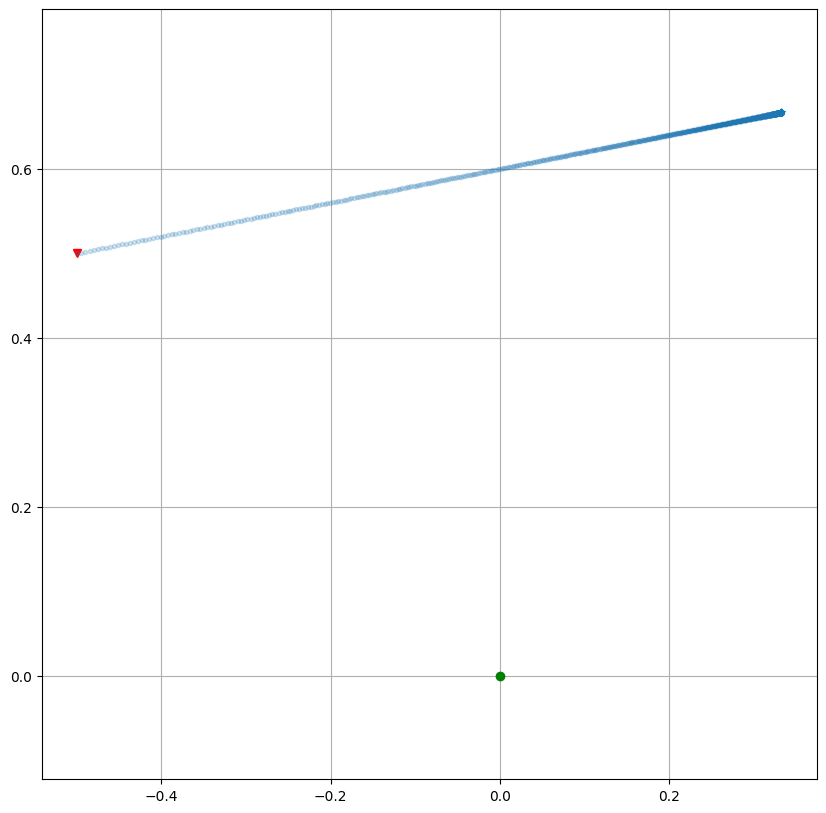

In [36]:
# Pruebe con distintos alphas

# sol, list_x, list_y = f_GD_l2(-0.5, 0.5, 1, 0.001, 10000)
# sol, list_x, list_y = f_GD_l2(-0.5, 0.5, 1.5, 0.001, 10000)
sol, list_x, list_y = f_GD_l2(-0.5, 0.5, 2, 0.001, 10000)

print("Solucion obtenida: ", sol)

plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.plot([0], [0], "go")
plt.plot([-0.5], [0.5], "rv")
plt.plot([sol[0]], [sol[1]], "c*")
plt.plot(list_x, list_y, ".", alpha=0.2)
plt.grid(True)
print(f"Valor Mínimo alcanzado: {f(sol)}")
plt.show()

### Parte 3 (1.0 pts)

Implemente una función `f_GD_l1(x_0, y_0, alpha, eta, num_iter)` que aplica descenso por el gradiente básico a la función $f$ junto a regularización $\ell_1$. Los argumentos `x_0` e `y_0` son el punto de partida, `alpha` es el parámetro de la regularización, `eta` es la tasa de aprendizaje y `num_iter` el número de iteraciones. La salida debe ser lo mismo que en la parte anterior. 

Ejecute su función con argumentos `x_0 = -0.5`, `y_0 = 0.5`, `eta = 0.001` y `num_iter = 10000`, y grafique en dos dimensiones la evolución del algoritmo. Pruebe valores de `alpha = 1, 1.5, 2`. ¿Qué puede observar?

In [11]:
def f_GD_l1(x_0, y_0, alpha, eta, num_iter):
    x = [x_0]
    y = [y_0]
    for k in range(num_iter):
        grad_x = 2*(x[k]-1) + alpha*np.sign(x[k])
        grad_y = 2*(y[k]-2) + alpha*np.sign(y[k])
        
        x.append(x[k] - eta * grad_x)
        y.append(y[k] - eta * grad_y)
        
    sol = np.array([x[-1], y[-1]])
    return sol, x, y

Solucion obtenida:  [5.46150242e-12 9.99999999e-01]
Valor Mínimo alcanzado: 3.0000000020093616


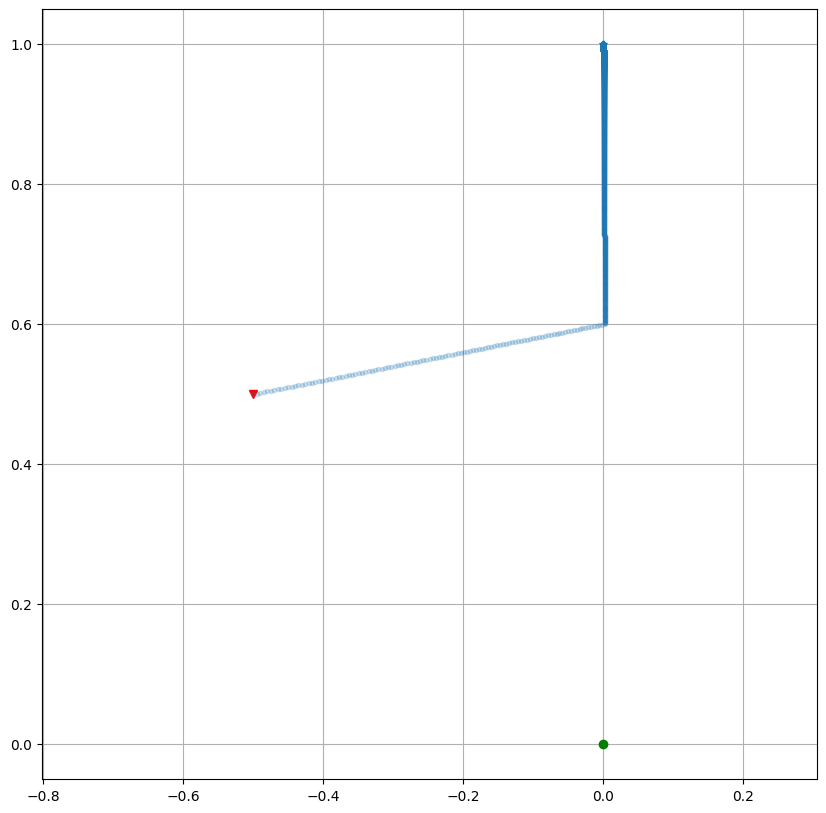

In [39]:
# Pruebe con distintos alphas

# sol, list_x, list_y = f_GD_l1(-0.5, 0.5, 1, 0.001, 10000)
# sol, list_x, list_y = f_GD_l1(-0.5, 0.5, 1.5, 0.001, 10000)
sol, list_x, list_y = f_GD_l1(-0.5, 0.5, 2, 0.001, 10000)

print("Solucion obtenida: ", sol)

plt.figure(figsize=(10, 10))
plt.axis('equal')
plt.plot([0], [0], "go")
plt.plot([-0.5], [0.5], "rv")
plt.plot([sol[0]], [sol[1]], "c*")
plt.plot(list_x, list_y, ".", alpha=0.2)
plt.grid(True)
print(f"Valor Mínimo alcanzado: {f(sol)}")
plt.show()